In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

print("Imported Successfully")

Imported Successfully


In [2]:
# Loading data from dataset
data = pd.read_csv('Dataset.csv')

# columns present in dataset
print(data.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [3]:
                           # Question 1 - Determine the percentage of restaurants that offer online delivery.

# Count the number of restaurants that offer online delivery ('Yes')
on_del = data['Has Online delivery'].value_counts().get('Yes', 0)
print("Total Online Delivery Count:", on_del)

# Count the number of restaurants that do NOT offer online delivery ('No')
of_del = data['Has Online delivery'].value_counts().get('No', 0)    
print("Total Offline Delivery Count:", of_del)

# Get the total number of restaurants in the dataset
total_rest = len(data)

# Calculate the percentage of restaurants that offer online delivery
online_Del_Per = round((on_del / total_rest) * 100, 2)
print("Online Delivery Percentage:", online_Del_Per, "%")

Total Online Delivery Count: 2451
Total Offline Delivery Count: 7100
Online Delivery Percentage: 25.66 %


Has Online delivery
No     2.47
Yes    3.25
Name: Aggregate rating, dtype: float64


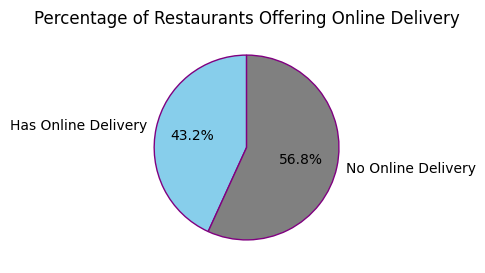

In [4]:
                         # Question 2 - Compare the average ratings of restaurants with and without online delivery.

# Calculate the average rating for restaurants with and without online delivery
avg_rating = round(data.groupby('Has Online delivery')['Aggregate rating'].mean(), 2)
print(avg_rating)

# Extract the values for 'Yes' and 'No' categories (handling cases where they might not exist)
yes = avg_rating.get('Yes', 0)  # Avg rating for restaurants with online delivery
no = avg_rating.get('No', 0)    # Avg rating for restaurants without online delivery

# Pie Chart - Percentage of Restaurants Offering Online Delivery 
plt.figure(figsize=(5, 3))
plt.pie(avg_rating, labels=['Has Online Delivery', 'No Online Delivery'], autopct='%1.1f%%', 
        colors=['skyblue', 'grey'], startangle=90, wedgeprops={'edgecolor': 'purple'})
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.show()

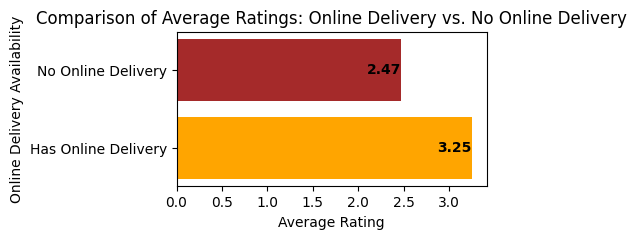

In [50]:
# Bar Chart - Comparison of Average Ratings with and without Online Delivery

# Adding Value Labels on Bars
labels = ['Has Online Delivery', 'No Online Delivery']
average_rating = [yes, no]  
colors = ['orange', 'brown']

plt.figure(figsize=(4, 2))
plt.barh(labels, average_rating, color=colors)
plt.xlabel('Average Rating')
plt.ylabel('Online Delivery Availability')
plt.title("Comparison of Average Ratings: Online Delivery vs. No Online Delivery")

# Added Value Labels on Bars
for index, value in enumerate(average_rating):
    plt.text(value, index, str(value), va='center', ha='right', fontsize=10, fontweight='bold')
plt.show()